In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from keras.preprocessing import sequence
import keras
import tensorflow as tf
from PIL import Image
from wordcloud import WordCloud
import nltk
import spacy
from nltk import word_tokenize
from nltk.util import ngrams
import re
import os
for dirname,_,filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

/kaggle/input/friends-tv-series-screenplay-script/S08E07 The Stain.txt
/kaggle/input/friends-tv-series-screenplay-script/S09E12 Phoebes Rats.txt
/kaggle/input/friends-tv-series-screenplay-script/S06E06 On The Last Night.txt
/kaggle/input/friends-tv-series-screenplay-script/S02E21 The Bullies.txt
/kaggle/input/friends-tv-series-screenplay-script/S02E15 Ross And Rachel... You Know.txt
/kaggle/input/friends-tv-series-screenplay-script/S01E01 Monica Gets A Roommate.txt
/kaggle/input/friends-tv-series-screenplay-script/S01E05 The East German Laundry Detergent.txt
/kaggle/input/friends-tv-series-screenplay-script/S04E07 Chandler Crosses The Line.txt
/kaggle/input/friends-tv-series-screenplay-script/S10E10 Chandler Gets Caught.txt
/kaggle/input/friends-tv-series-screenplay-script/S08E09 The Rumor.txt
/kaggle/input/friends-tv-series-screenplay-script/S07E14 They All Turn Thirty.txt
/kaggle/input/friends-tv-series-screenplay-script/S10E01 Joey and Rachel Kiss.txt
/kaggle/input/friends-tv-series

In [2]:
text = ''
folder_name = '../input/friends-tv-series-screenplay-script'
for f in glob.glob(folder_name+'/*.txt'):
    temp = open(f, 'r')
    text += temp.read()
    temp.close()

In [3]:
print ('Length of the script:{} characters'.format(len(text)))

Length of the script:4933030 characters


In [4]:
print(text[:500])

The One With The Stain
Written by: R. Lee Fleming, Jr.


[Scene: Monica and Chandler's, Chandler is sitting in the living room as Monica enters.]

Monica: Hey.

Chandler: Hey.

(Monica notices something.)

Monica: Oh my God! You cleaned! (Gasps) Look at these floors! You did the windows! Oh, I have been begging you for months and you did! You cleaned! And nagging works!

Chandler: Y’know uh, I didn’t actually do this.

Monica: Oh no, was I cleaning in my sleep again?

Chandler: No, it wasn’t you


## EDA

In [5]:
# adding notes to stopwords
nlp = spacy.load("en_core_web_sm")
nlp.Defaults.stop_words |= {"d","ll","m","re","s","ve", "t", "oh", "uh", "na", "okay",
                           "didn","don","gon","j","hm","um","dr","room","int", "ext", 
                           "cut", "day", "night", "theme", "tune","music", "ends","view","opening credits scene", 
                            "commercial break scene", "hey hey hey", "hey", "closing credits scene","scene",
                            "closeup", 'freshly', 'squeezed', 'fade'}

stopwords = nlp.Defaults.stop_words

In [6]:
all_words = nltk.tokenize.word_tokenize(text.lower())
all_words_no_stop = nltk.FreqDist(w.lower() for w in all_words if w not in stopwords)

## Create a wordcloud

(-0.5, 399.5, 199.5, -0.5)

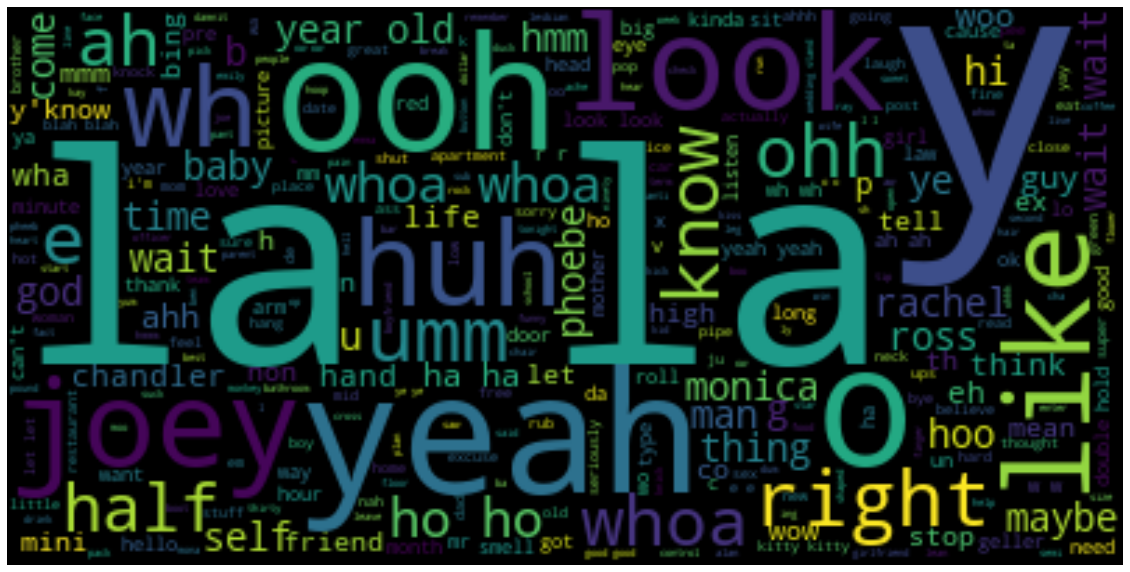

In [7]:
wordcloud = WordCloud(max_words = 5000,stopwords = stopwords,contour_width = 4)
wordcloud.generate(" ".join(all_words_no_stop.keys()))

plt.figure(figsize=(20,20))
plt.imshow(wordcloud.recolor(random_state=3),interpolation = 'bilinear')
plt.axis('off')

## Count the Frequency of character names

In [8]:
print('Chandler has been called {} times'.format(all_words_no_stop['chandler']))
print('Phoebe has been called {} times'.format(all_words_no_stop['phoebe']))
print('Rachel has been called {} times'.format(all_words_no_stop['rachel']))
print('Monica has been called {} times'.format(all_words_no_stop['monica']))
print('Ross has been called {} times'.format(all_words_no_stop['ross']))
print('Joey has been called {} times'.format(all_words_no_stop['joey']))

Chandler has been called 13019 times
Phoebe has been called 10565 times
Rachel has been called 13687 times
Monica has been called 12946 times
Ross has been called 13822 times
Joey has been called 13011 times


In [9]:
print('{} times Joey used how you doin?'.format(all_words_no_stop['doin']))

92 times Joey used how you doin?
